# Building Random Forests

In this exercise, will you will train two random forest classifiers and compare their performances. 

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


We will also import the scikit-learn `RandomForestClassifier`, the `train_test_split()` function for splitting the data into training and test sets, and the functions `roc_curve` and `auc` to evaluate the model. 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

##  Step 1: Load a 'ready-to-fit' Data Set 

We will work with the "cell2celltrain" data set. This data set is already preprocessed, with the proper formatting, outliers, and missing values taken care of, and all numerical columns scaled to the [0, 1] interval. One-hot encoding has been performed on all categorical columns. Run the cell below to load the data set and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")
df = pd.read_csv(filename, header=0)

## Step 2: Create Training and Test Data Sets

### a. Create Labeled Examples

Let's obtain columns from our data set to create labeled examples. 
The code cell below carries out the following steps:

* Gets the `Churn` column from DataFrame `df` and assigns it to the variable `y`. This will be our label.
* Assigns all other columns from DataFrame `df` to the variable `X`. These will be our features. 


In [4]:
y = df['Churn'] 
X = df.drop(columns = 'Churn', axis=1)

### b. Split Labeled Examples Into Training and Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [6]:
X_train.head()

,CustomerID,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Married_False,Married_True,Married_nan
10351,3081630,True,False,True,True,True,True,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
33816,3269538,False,False,True,True,False,True,True,True,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36668,3292822,False,False,True,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12787,3100870,True,False,True,False,False,True,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2635,3020642,False,False,True,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Step 3: Fit Two Random Forest Classifiers

<p>The random forest (RF) algorithm is probably the most well known and utilized implementation of the bagging technique. A RF is an ensemble of decision trees, where both bagging and random feature selection are used to reduce the variance of the forest.
    
We will use the scikit-learn's `RandomForestClassifier`. Please refer to the online [documentation](http://scikit-learn.org/stable/modules/ensemble.html) for a brief overview of scikit-learn's ensemble methods.

We will not perform any special hyperparameter optimization, but will instead compare two Random Forest models that differ only in the number of estimators (decision trees).

In the code cell below, build and train two random forest models, one with 20 estimators and one with 100 estimators. 

1. Use ```RandomForestClassifier()``` to create a model object, and assign the result to the variable ```rf_20_model```. You will provide the following arguments: <b>criterion='entropy', n_estimators=20</b>.

2. Fit ```rf_20_model``` to the training data.

3. Use the ```predict_proba()``` method  to use the fitted model `rf_20_model` to predict values for the test data. The method will return two columns. Store the values of the *second* column to a list named ```rf_20_predictions``` (Note: Remember to convert the resulting array to a list). 

4. Use ```RandomForestClassifier()``` to create a model object, and assign the result to the variable ```rf_100_model```. You will provide the following arguments: <b>criterion='entropy', n_estimators=100</b>.

5. Fit ```rf_100_model``` to the training data.

6. Use the ```predict_proba()``` method  to use the fitted model `rf_100_model` to predict values for the test data. The method will return two columns. Store the values of the *second* column to a list named ```rf_100_predictions``` (Note: Remember to convert the resulting array to a list). 

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code. Note: This may take a few minutes to run.

In [7]:
print('Begin Random Forest Implementation...')
# 1. Create the RandomForestClassifier model object below and assign to variable 'rf_20_model'

# YOUR CODE HERE
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)

# 2. Fit the model to the training data below

# YOUR CODE HERE
rf_20_model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the result to a 
# list named 'rf_20_predictions' below

# YOUR CODE HERE
rf_20_predictions = list(rf_20_model.predict_proba(X_test)[:, 1])

# 4. Create the RandomForestClassifier model object below and assign to variable 'rf_100_model'

# YOUR CODE HERE
rf_100_model = RandomForestClassifier(criterion='entropy', n_estimators=100)

# 5. Fit the model to the training data below

# YOUR CODE HERE
rf_100_model.fit(X_train, y_train)

# 6. Make predictions on the test data using the predict_proba() method and assign the result to a 
# list named 'rf_100_predictions' below

# YOUR CODE HERE
rf_100_predictions = list(rf_100_model.predict_proba(X_test)[:,1])

print('End')

Begin Random Forest Implementation...
End


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell. Note: This may take a few minutes to run.

In [8]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testRFModel

try:
    p, err = testRFModel(df, rf_20_model, rf_100_model, rf_20_predictions, rf_100_predictions)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Running Test...
Correct!


## Step 4: Evaluate the Performance Using ROC and AUC

We will now plot two ROC curves for the two RF classifiers on the same graph. 

In the code cell below, use the `roc_curve()` function to record the true positive and false positive rates for both models. 

1. Call `roc_curve()` with arguments `y_test` and `rf_20_predictions`. The `roc_curve` function produces three outputs. Save the three items to the following variables, respectively: `fpr_20`, `tpr_20`, and `thresholds_20`.

2. Call `roc_curve()` with arguments `y_test` and `rf_100_predictions`. Save the three items to the following variables, respectively: `fpr_100`, `tpr_100`, and `thresholds_100`.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code. Note: This may take a few minutes to run.

In [9]:
print('Computing ROC Curve...')

#1. Use roc_curve to record fpr and tpr for rf_20_model
# YOUR CODE HERE
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test, rf_20_predictions)

#2. Use roc_curve to record fpr and tpr for rf_100_model
# YOUR CODE HERE
fpr_100, tpr_100, thresholds_100 = roc_curve(y_test, rf_100_predictions)

print('End')


Computing ROC Curve...
End


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell. Note: This may take a few minutes to run.

In [10]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testROC

try:
    p, err = testROC(df, rf_20_model, rf_100_model, rf_20_predictions, rf_100_predictions, 
                fpr_20, tpr_20, thresholds_20, fpr_100, tpr_100, thresholds_100)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Running Test...
Correct!


The code cell below plots the ROC curves for both models. Run the code cell and inspect the results.

Plotting ROC Curve...


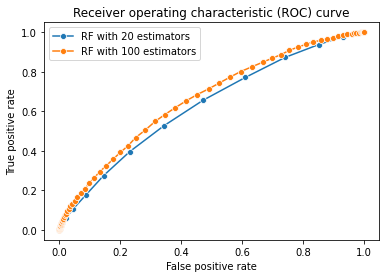

In [11]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()


<p>You should see that with the random forest model that was fit using a larger number of estimators performs better. Let's quantify this difference in performance using AUC.

In the code cell below, use the `auc()` function to compute the areas under each of the receiver operating characteristic (ROC) curves. 

For each model, call the function with the `fpr` argument first and the `tpr` argument second. 
Save the results to variables `auc_20` and `auc_100`.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [12]:
#1. AUC for rf_20_model
# YOUR CODE HERE
auc_20 = auc(fpr_20, tpr_20)

print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))

# 2. AUC for rf_100_model
# YOUR CODE HERE
auc_100 = auc(fpr_100, tpr_100)

print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))


AUC of the RF model with 20 estimators is 0.629
AUC of the RF model with 100 estimators is 0.663


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell. Note: This may take a few minutes to run.

In [13]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testROC

try:
    p, err = testROC(df, rf_20_model, rf_100_model, rf_20_predictions, rf_100_predictions, 
                fpr_20, tpr_20, thresholds_20, fpr_100, tpr_100, thresholds_100, [auc_20, auc_100])
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Running Test...
Correct!
